In [2]:
# Necessary restart
data = read('data/credit-data.csv')
li = 1
fi = [2,3,4,5,6,7,8,9,10,11,12]
label = data.columns[li]
features = list(data.columns[fi])
convert_vartype(data, label, 'bool')
convert_vartype(data, 'NumberOfDependents', 'int')

In [3]:
fill_miss(data, 'MonthlyIncome', method='mean')
fill_miss(data, 'NumberOfDependents', method='median')

In [4]:
discretize(data, 'MonthlyIncome', 5, 'ufov')
discretize(data, 'age', 5, 'uv')
discretize(data, 'DebtRatio', 5, 'logspace')
gen_dummies(data, ['age_cat',
                   'DebtRatio_cat',
                   'MonthlyIncome_cat'], drop = True)

Warning, DebtRatio has negative or zero values


In [59]:
data.dtypes

PersonID                                  int64
SeriousDlqin2yrs                           bool
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
zipcode                                   int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
age_cat_1                                  bool
age_cat_2                                  bool
age_cat_3                                  bool
age_cat_4                                  bool
age_cat_5                                  bool
DebtRatio_cat_1                            bool
DebtRatio_cat_2                            bool
DebtRatio_cat_3                         

### Initial Settings

In [3]:
import time
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.4/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [5]:
# Import custom modules

import sys
sys.path.append('./MachineLearning ToolBox')
        
from Pipeline1_read import read
from Pipeline2_explore import tabular, histogram
from Pipeline3_preprocess import check_miss, fill_miss, convert_vartype
from Pipeline4_features import discretize, gen_dummies
from Pipeline5_classifier import display_importance, classify
from Pipeline6_evaluate import evaluate, plot_roc
from Pipeline7_predict import (best_clf, 
                               clf_loop, 
                               plot_precision_recall_n,
                               define_clfs_params,
                               Zero_Predictor,
                               Average_Predictor,
                               report,
                               calc_precision_recall,
                               plot_precision_recall_threshold,
                               precision_top_x)

In [15]:
#ML imports
from collections import Counter
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier,
                              BaggingClassifier)
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (roc_curve,
                             precision_recall_curve, 
                             average_precision_score,
                             accuracy_score,
                             precision_score,
                             recall_score,
                             auc, 
                             classification_report, 
                             confusion_matrix, 
                             f1_score)
from time import time
from inspect import signature
from pprint import pprint

# from imblearn import under_sampling, over_sampling
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler

In [12]:
#Notebook commands
from IPython.display import Image  
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Step 1. Read/Load Data

In [4]:
# Read Data into Pandas object
data = read('data/credit-data.csv')

## Step 2. Explore Data

In [3]:
# Peek at columns to understand potential features and labels
data.dtypes

PersonID                                  int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
zipcode                                   int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [5]:
# Our dependent variable (label) is 'SeriousDlqin2yrs'
# Our independent variables (features) are all column names other 
# than 'PersonID' and the label

li = 1
fi = [2,3,4,5,6,7,8,9,10,11,12]
label = data.columns[li]
features = list(data.columns[fi])

In [6]:
for varname in features:
    print(tabular(data,varname))

          RevolvingUtilizationOfUnsecuredLines   Percent
0.000000                                 10878  0.072520
1.000000                                 10256  0.068373
1.000000                                    17  0.000113
0.950100                                     8  0.000053
0.713147                                     6  0.000040
0.007984                                     6  0.000040
0.954092                                     6  0.000040
0.994012                                     5  0.000033
0.004999                                     5  0.000033
0.582834                                     5  0.000033
0.046048                                     5  0.000033
0.988024                                     5  0.000033
0.717131                                     5  0.000033
0.538922                                     5  0.000033
0.850299                                     5  0.000033
0.796407                                     5  0.000033
1.003322                       

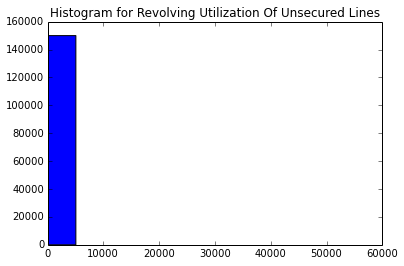

None


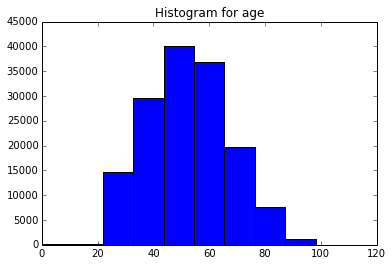

None


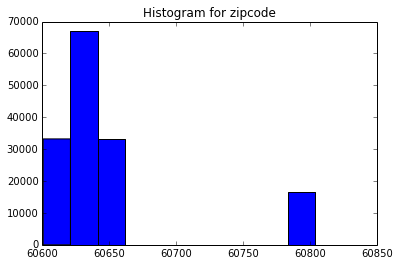

None


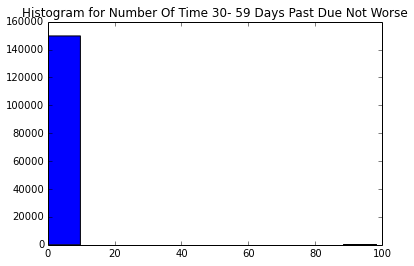

None


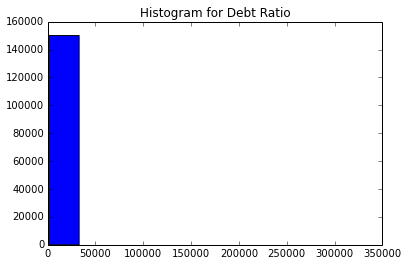

None


AttributeError: max must be larger than min in range parameter.

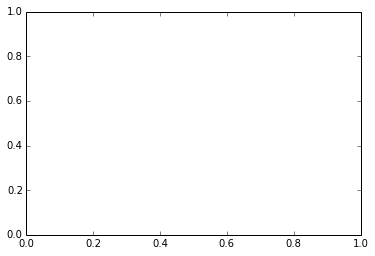

In [7]:
for varname in features:
    print(histogram(data,varname))

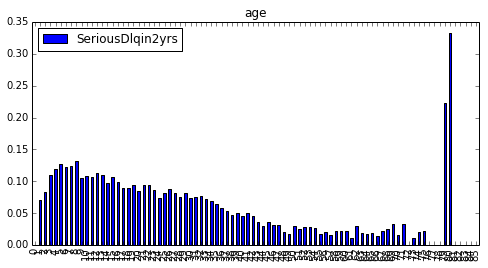

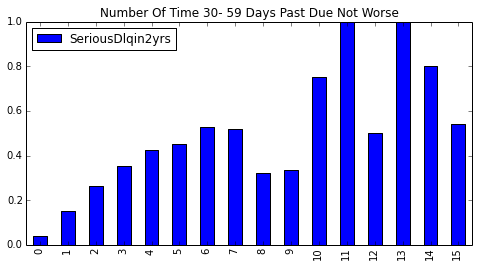

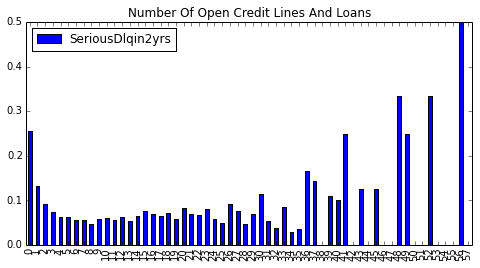

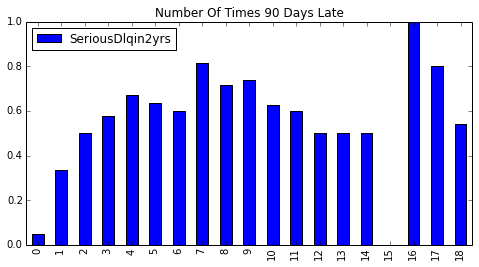

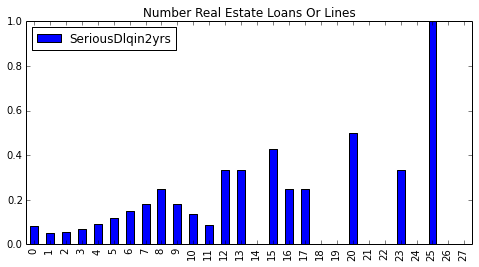

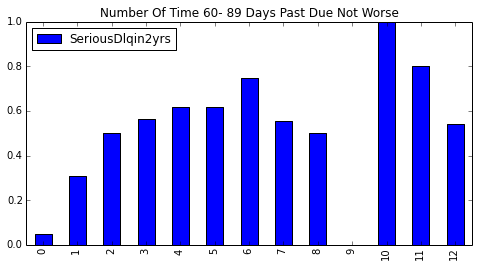

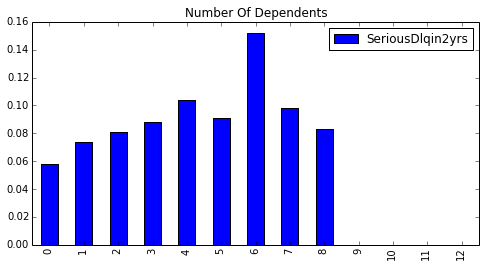

In [26]:
for varname in ['age',
                'NumberOfTime30-59DaysPastDueNotWorse',
                'NumberOfOpenCreditLinesAndLoans',
                'NumberOfTimes90DaysLate',
                'NumberRealEstateLoansOrLines',
                'NumberOfTime60-89DaysPastDueNotWorse',
                'NumberOfDependents']:
    explore_varname(data,varname,label,'bar')["graph"]

## Step 3. Pre-process data

In [28]:
# Fix variable types
convert_vartype(data, label, 'bool')
convert_vartype(data, 'NumberOfDependents', 'int')

In [15]:
# Check for missing values
check_miss(data)

MonthlyIncome has missing values!
NumberOfDependents has missing values!


In [16]:
# How many?
data.isnull().sum().sort_values(ascending = False)

MonthlyIncome                           29731
NumberOfDependents                       3924
NumberOfTime60-89DaysPastDueNotWorse        0
NumberRealEstateLoansOrLines                0
NumberOfTimes90DaysLate                     0
NumberOfOpenCreditLinesAndLoans             0
DebtRatio                                   0
NumberOfTime30-59DaysPastDueNotWorse        0
zipcode                                     0
age                                         0
RevolvingUtilizationOfUnsecuredLines        0
SeriousDlqin2yrs                            0
PersonID                                    0
dtype: int64

In [13]:
# Fill missing values
fill_miss(data, 'MonthlyIncome', method='mean')
fill_miss(data, 'NumberOfDependents', method='median')

In [31]:
# Check for missing values
check_miss(data)

No missing values!


## Step 4. Create Features

### Selecting Features

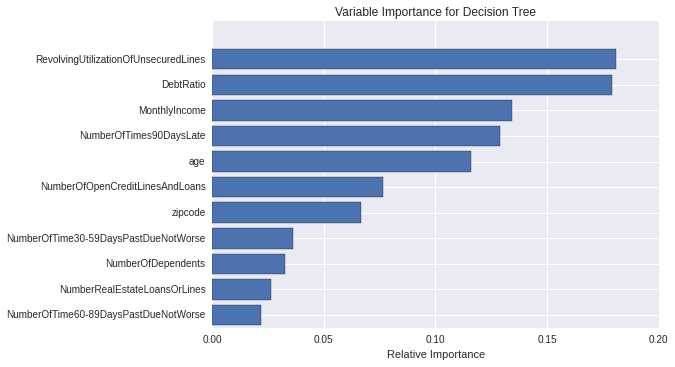

In [54]:
display_importance(data, label, features, "Decision Tree")

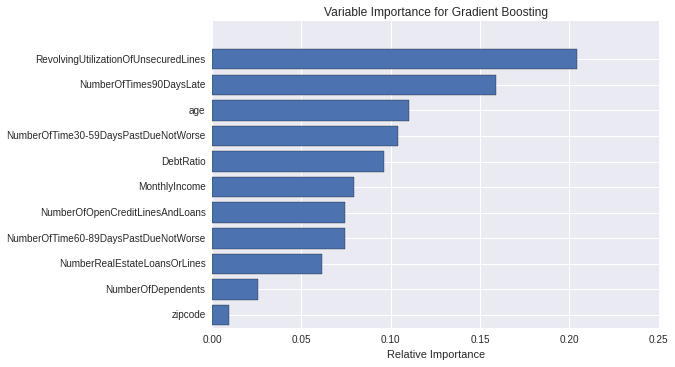

In [55]:
display_importance(data, label, features, "Gradient Boosting")

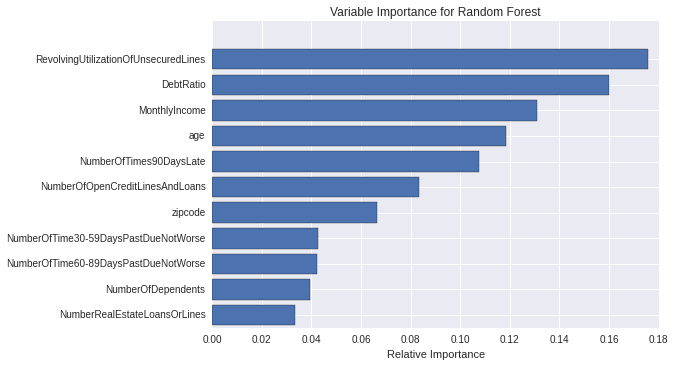

In [56]:
display_importance(data, label, features, "Random Forest")

It seems like the 5 most important features among our classifiers is consistently:
* **'RevolvingUtilizationOfUnsecuredLines'**
* **'NumberOfTimes90DaysLate'**
* **'MonthlyIncome'** 
* **'age'**
* **'DebtRatio'** 

Only once, **'NumberOfTime30-59DaysPastDueNotWorse'** is also among the top five. It may be worth to consider it a main feature.

### Discretizing Features

In [ ]:
data['NumberOfTimes90DaysLate'].plot.bar()

In [14]:
discretize(data, 'MonthlyIncome', 5, 'ufov')
discretize(data, 'age', 5, 'uv')
discretize(data, 'DebtRatio', 5, 'logspace')

Warning, DebtRatio has negative or zero values


In [15]:
gen_dummies(data, ['age_cat',
                   'DebtRatio_cat',
                   'MonthlyIncome_cat'], drop = True)

In [28]:
data.dtypes

PersonID                                  int64
SeriousDlqin2yrs                           bool
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
zipcode                                   int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
age_cat_1                                  bool
age_cat_2                                  bool
age_cat_3                                  bool
age_cat_4                                  bool
age_cat_5                                  bool
DebtRatio_cat_1                            bool
DebtRatio_cat_2                            bool
DebtRatio_cat_3                         

In [16]:
main_features= ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTimes90DaysLate',
                'NumberOfTime30-59DaysPastDueNotWorse', 'MonthlyIncome_cat_1',
                'MonthlyIncome_cat_2', 'MonthlyIncome_cat_3',
                'MonthlyIncome_cat_4', 'MonthlyIncome_cat_5',
                'age_cat_1', 'age_cat_2', 'age_cat_3', 'age_cat_4', 'age_cat_5',
                'DebtRatio_cat_1', 'DebtRatio_cat_2', 'DebtRatio_cat_3',
                'DebtRatio_cat_4', 'DebtRatio_cat_5','DebtRatio_cat_6']

In [62]:
#X = data.loc[:, main_features]

## Step 5. Classify

In [17]:
from sklearn import cross_validation, metrics, preprocessing
from sklearn.feature_selection import SelectKBest, f_classif

In [5]:
y = data[label]
X = data[features]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(y, 
                                                    X, 
                                                    test_size = 0.20,
                                                    random_state = 5678)

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
def best_clf(clf, params, kwargs={'random_state': 5678,
                                        'n_jobs': -1}):
    """
    Experiment with different parameters for the classifier; report 
        the scores and the best parameter set.
    
    Args:
        clf: classifier object; the testing classifier algorithm
        params: dict; experimental parameter sets
        kwargs: dict, default to {'random_state': 1234, 'n_jobs': -1}; 
            additional keyword arguments passed to the classifier 
            function call
    """
    
    svr = clf(**kwargs)
    clf = GridSearchCV(svr, params)
    clf.fit(X_train, y_train)

    print(classification_report(labels_test, clf.predict(features_test)))
    print('\nBest parameters for {}: {}'.format(clf, clf.best_params_))

In [19]:
from sklearn.linear_model import LogisticRegression
params_lr = {'C':[1.0, 3.0],    # Default to 1.0
             'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag')}
best_clf(LogisticRegression, params_lr)

/home/student/.local/lib/python3.4/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: bad input shape (80000, 11)

In [109]:
X.dtypes

NumberOfDependents          float64
MonthlyIncome_cat_1            bool
MonthlyIncome_cat_2            bool
MonthlyIncome_cat_3            bool
MonthlyIncome_cat_4            bool
MonthlyIncome_cat_5            bool
age_cat_1                      bool
age_cat_2                      bool
age_cat_3                      bool
age_cat_4                      bool
age_cat_5DebtRatio_cat_1    float64
DebtRatio_cat_2                bool
DebtRatio_cat_3                bool
DebtRatio_cat_4                bool
DebtRatio_cat_5                bool
DebtRatio_cat_6                bool
dtype: object

In [ ]:
model, X_train, X_test, y_train, y_test = \
    classify(data, main_features, label, method_dict)

# Old Code

In [23]:
try:
    from sklearn.model_selection import train_test_split
except:
    from sklearn.cross_validation import train_test_split

from sklearn.grid_search import ParameterGrid
from sklearn.metrics import roc_auc_score

import pandas as pd

FEATURES = ['NumberOfDependents', 'age', 'MonthlyIncome_cat_0',
       'MonthlyIncome_cat_1', 'MonthlyIncome_cat_2', 'MonthlyIncome_cat_3',
       'MonthlyIncome_cat_4', 'DebtRatio_cat_0',
       'DebtRatio_cat_1', 'DebtRatio_cat_2', 'DebtRatio_cat_3',
       'DebtRatio_cat_4', 'DebtRatio_cat_5']

MODELS_TO_RUN = ['RF', 'BA', 'AB', 'LR', 'SVM', 'DT', 'KNN']

GRID = test_grid

X = data.loc[:, FEATURES ]

Y = data['SeriousDlqin2yrs']

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=None)

results_df =  pd.DataFrame(columns=(
        'model_type','clf', 'parameters', 'auc-roc','p_at_5', 'p_at_10', 'p_at_20'))

for model_name in MODELS_TO_RUN:
    print(model_name)
    clf = make_model(model_name)
    parameter_values = GRID[model_name]

    for p in ParameterGrid(parameter_values):
        clf.set_params(**p)
        y_pred_probs = clf.fit(X_train, y_train).predict_proba(X_test)[:,1]
        y_pred_probs_sorted, y_test_sorted = zip(*sorted(zip(y_pred_probs, y_test), reverse=True))
        results_df.loc[len(results_df)] = [model_name, clf, p,
                                       roc_auc_score(y_test, y_pred_probs),
                                       precision_at_k(y_test_sorted,y_pred_probs_sorted,5.0),
                                       precision_at_k(y_test_sorted,y_pred_probs_sorted,10.0),
                                       precision_at_k(y_test_sorted,y_pred_probs_sorted,20.0)]


(120000, 17)
(120000,)


In [41]:
# The task here is to predict who will  experience financial 
# distress in the next two years. The outcome variable (label) 
# in the data is SeriousDlqin2yrs. We have access to other information 
# about this person (as described in the data dictionary). Your assignment 
#is to take this data and build a machine learning pipeline that 
#trains *one* machine learning model on the data. 

from sklearn.model_selection import train_test_split


X = data.loc[:, ('NumberOfDependents', 'age', 'MonthlyIncome_cat_0',
       'MonthlyIncome_cat_1', 'MonthlyIncome_cat_2', 'MonthlyIncome_cat_3',
       'MonthlyIncome_cat_4', 'DebtRatio_cat_0',
       'DebtRatio_cat_1', 'DebtRatio_cat_2', 'DebtRatio_cat_3',
       'DebtRatio_cat_4', 'DebtRatio_cat_5')]

Y = data['SeriousDlqin2yrs']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=None)
    
model = MyClassifier(X_train, Y_train, 'logistic')

model.model.score(X_test, Y_test)

0.93222735021412828

In [50]:
print(model.model.coef_)

  (0, 0)	0.127809847759
  (0, 1)	-0.0249639248121
  (0, 2)	-0.6330416073
  (0, 3)	0.0735662264515
  (0, 4)	0.0156168493632
  (0, 5)	-0.431096931943
  (0, 6)	-0.192146223752
  (0, 7)	-0.0627019385459
  (0, 8)	-0.250363667995
  (0, 9)	-1.00262573203
  (0, 10)	-0.928702764814
  (0, 11)	-0.819218492033


### Step 6. Evaluate

In [42]:
model.model.score(X_test, Y_test)

0.93222735021412828

In [51]:
import pandas as pd

probas = model.model.predict_proba(X_test)

pd.crosstab(Y_test, probas[:,1] > 0.2, rownames=["Actual"], colnames=["Predicted"])

Predicted,False,True
Actual,,
False,22415,6
True,1628,2


In [57]:
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve

In [53]:
accuracy_score(Y_test, probas[:,1] > 0.2)

0.93206103696312004

In [56]:
print(classification_report(Y_test, probas[:,1] > 0.2))

             precision    recall  f1-score   support

      False       0.93      1.00      0.96     22421
       True       0.25      0.00      0.00      1630

avg / total       0.89      0.93      0.90     24051



In [59]:
precision_recall_curve(Y_test, probas[:,1])

(array([ 0.06846151,  0.06842525,  0.06843388, ...,  0.5       ,
         0.        ,  1.        ]),
 array([  1.00000000e+00,   9.99386503e-01,   9.99386503e-01, ...,
          6.13496933e-04,   0.00000000e+00,   0.00000000e+00]),
 array([ 0.01637779,  0.01639506,  0.01653906, ...,  0.21941202,
         0.21992459,  0.23751897]))

In [ ]:
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

confusion_matrix(Y_test, model.model.predict(X_test))


In [ ]:
probas = model.model.predict_proba(X_train)

In [ ]:
sum(probas[:,1] > 0.2)

In [ ]:
model.model.predict(X_test)

In [ ]:
d = pd.DataFrame({'a': [5,6,7], 'b':[0,1,3]}, index=[10,13,14])
d = binarize_categories(d, ['a'], True)
d.head()